In [234]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Dataset link: https://www.kaggle.com/datasets/captainozlem/framingham-chd-preprocessed-data/data

## 1. Data Description

### Demographic:
- **Sex**: male or female (Nominal)
- **Age**: Age of the patient; (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### Behavioral
- **Education**: 
  - 0: Less than High School and High School degrees
  - 1: College Degree and Higher
- **Current Smoker**: whether or not the patient is a current smoker (Nominal)
- **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day. (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### Medical (history)
- **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
- **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
- **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
- **Diabetes**: whether or not the patient had diabetes (Nominal)

### Medical (current)
- **Tot Chol**: total cholesterol level (Continuous)
- **Sys BP**: systolic blood pressure (Continuous)
- **Dia BP**: diastolic blood pressure (Continuous)
- **BMI**: Body Mass Index (Continuous)
- **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of a large number of possible values.)
- **Glucose**: glucose level (Continuous)

### Predict variable (desired target)
- **10 year risk of coronary heart disease CHD** (binary: “1”, means “Yes”, “0” means “No”)

In [235]:
df = pd.read_csv("./CHD_preprocessed.csv")

In [236]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [237]:
# Checking if there are any misslabeled data - non-smoer but there are vlaues type for cigsPerDay.
df[df['currentSmoker'] == 0]['cigsPerDay'].sum()

0.0

In [238]:
# Checking Missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


In [239]:
# Basic Stat
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4133.0,0.427293,0.494745,0.00,0.00,0.00,1.00,1.0
age,4133.0,49.557222,8.561628,32.00,42.00,49.00,56.00,70.0
education,4133.0,0.280668,0.449380,0.00,0.00,0.00,1.00,1.0
currentSmoker,4133.0,0.494798,0.500033,0.00,0.00,0.00,1.00,1.0
cigsPerDay,4133.0,9.101621,11.918440,0.00,0.00,0.00,20.00,70.0
BPMeds,4133.0,0.034358,0.182168,0.00,0.00,0.00,0.00,1.0
prevalentStroke,4133.0,0.006049,0.077548,0.00,0.00,0.00,0.00,1.0
prevalentHyp,4133.0,0.311154,0.463022,0.00,0.00,0.00,1.00,1.0
diabetes,4133.0,0.025647,0.158100,0.00,0.00,0.00,0.00,1.0
totChol,4133.0,236.664408,43.909188,107.00,206.00,234.00,262.00,600.0


In [240]:
cols = df.columns

In [241]:
# Checking if any value that contains space(' ')
check_spaces = df.apply(lambda x: x.map(lambda x: str(x).isspace()))
print(check_spaces.any(axis=1).sum())

0


## 2. Exploratory Data Analysis (EDA)

### 1) Histograms

In [242]:
print(f"{cols}")

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


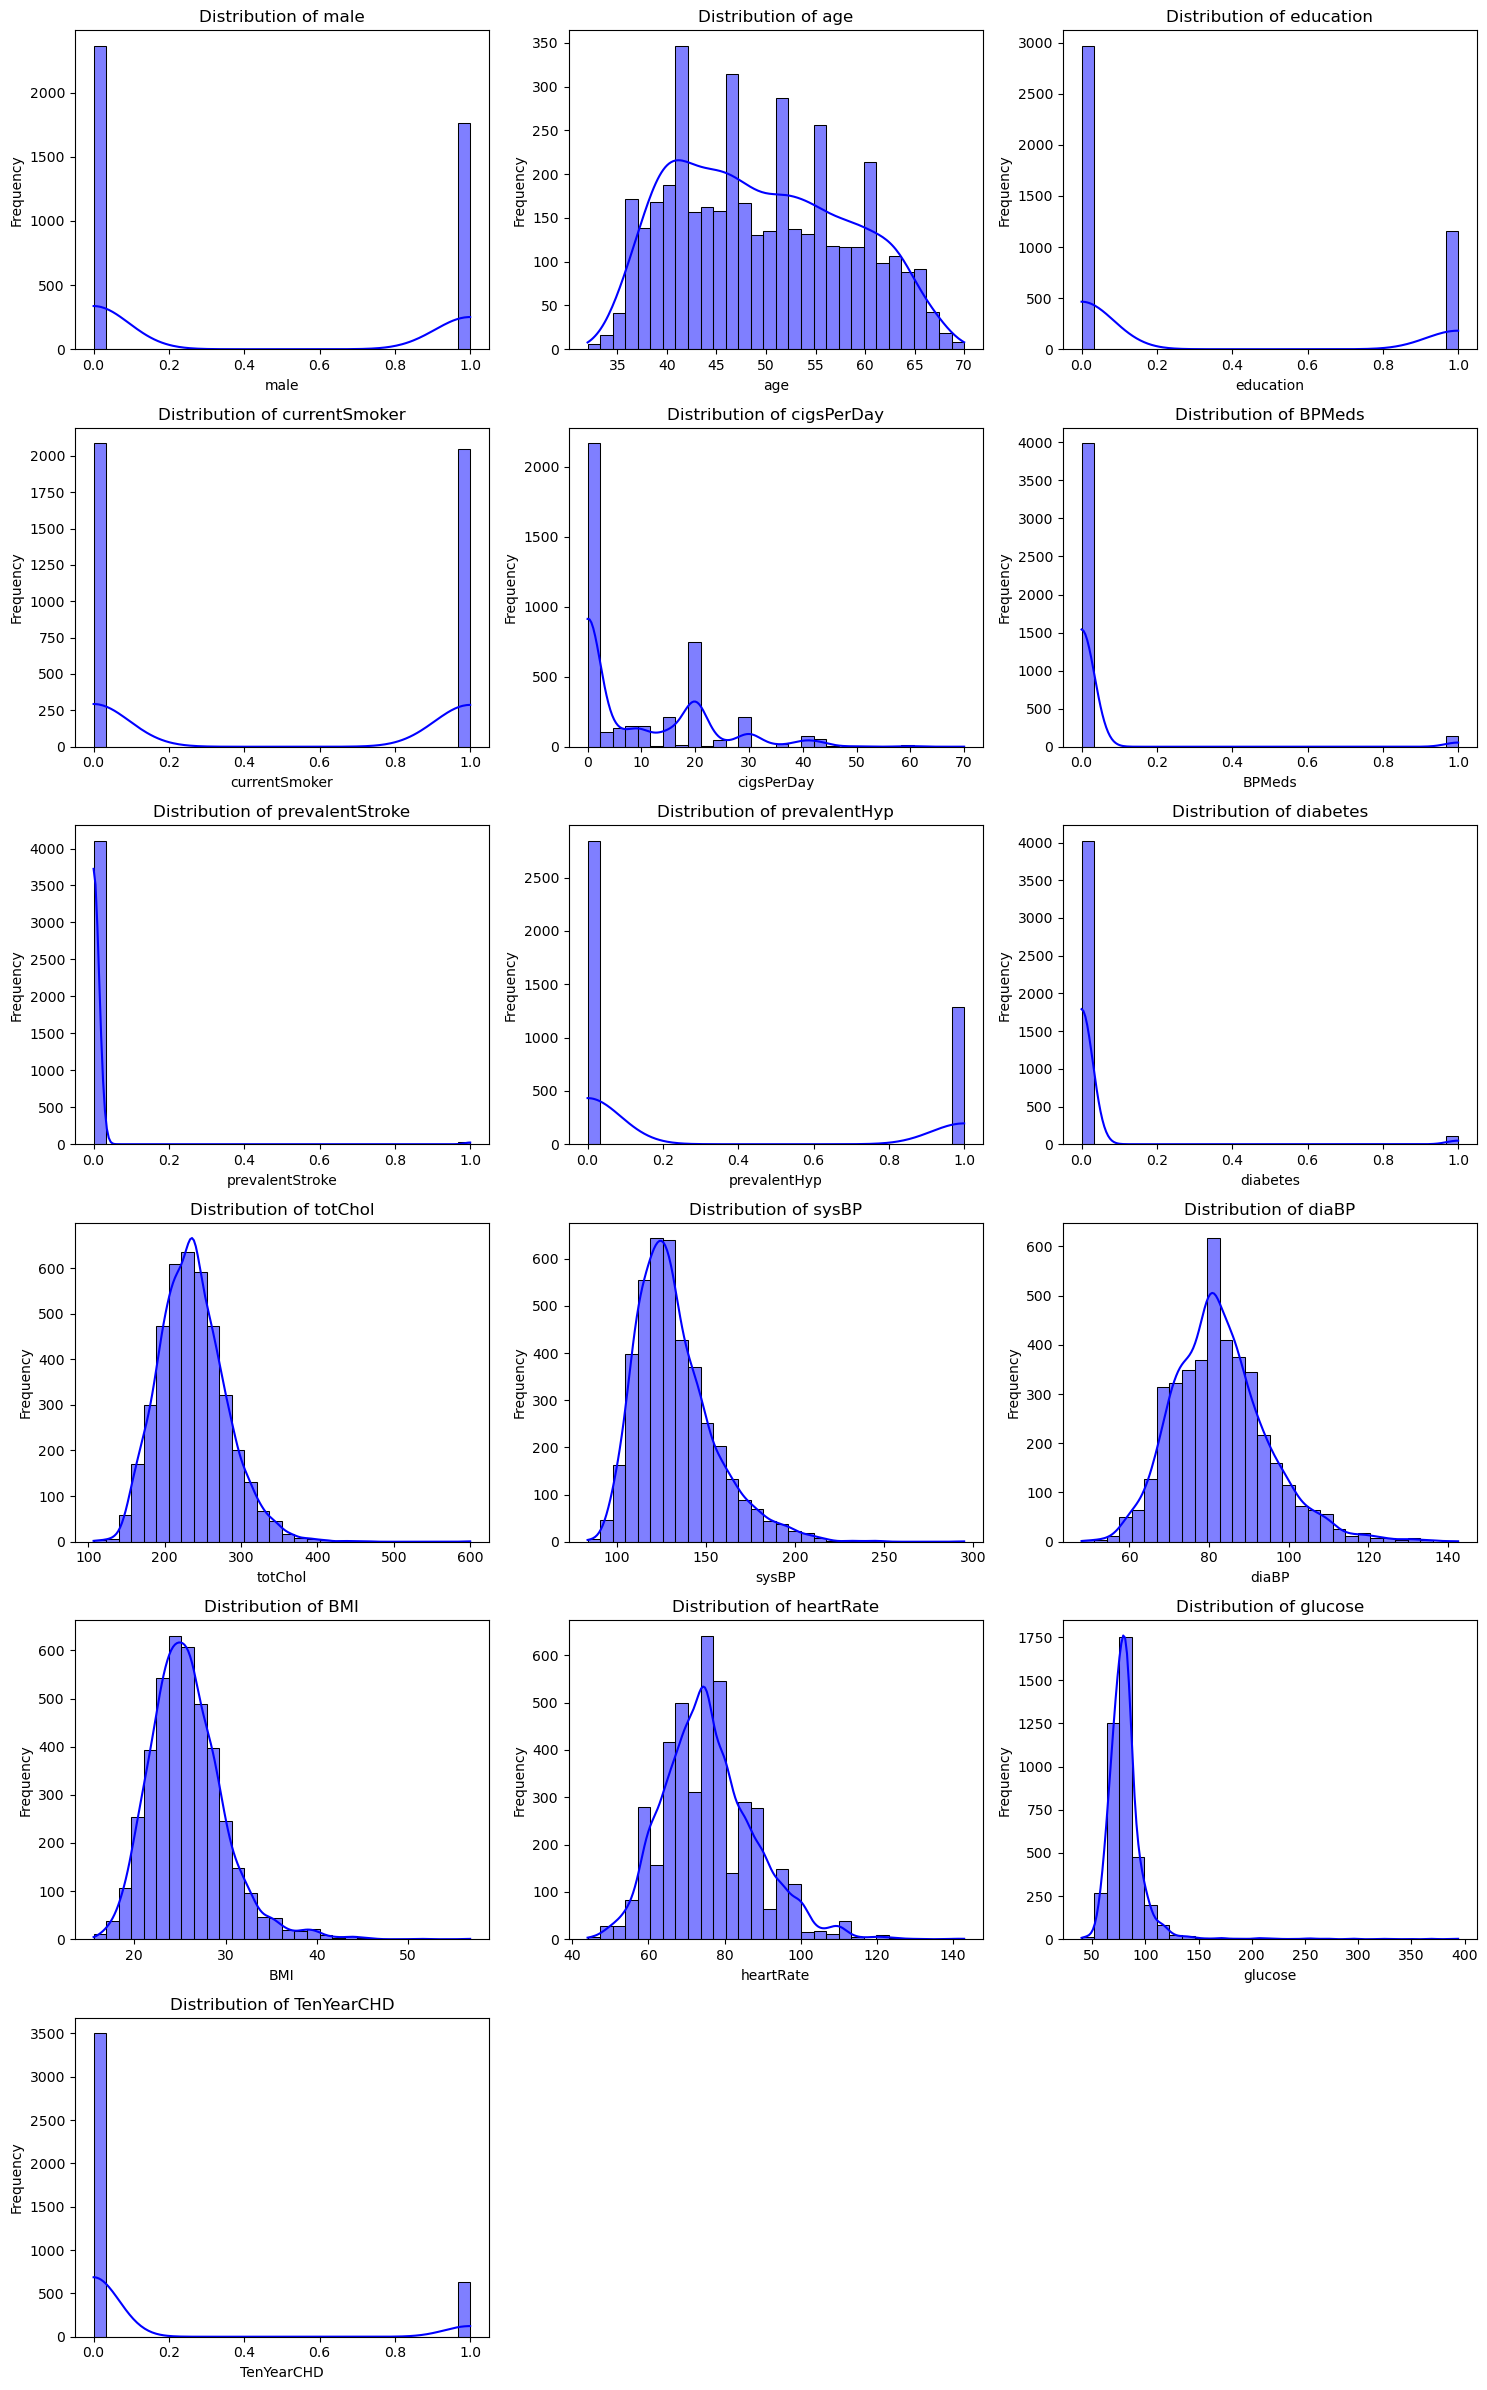

In [243]:
cols = [col for col in df.columns if df[col].dtype in [np.int64, np.float64]]  # Filter numerical columns

# Calculate the number of rows/columns needed for subplots
n_rows = int(np.ceil(len(cols) / 3))  # Adjust '3' to change number of columns per row

plt.figure(figsize=(15, n_rows * 4))  # Dynamic figure size

for i, col in enumerate(cols, 1): 
    plt.subplot(n_rows, 3, i)  # Adjust '3' to match the number above  # 6, 3 
    sns.histplot(df[col], bins=30, kde=True, color='blue')  # Using seaborn for a better visual (kde is optional)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

In [244]:
sorted_counts = df['age'].value_counts().sort_values(ascending=False)
sorted_counts

age
40    188
46    180
42    176
41    171
39    168
48    167
44    162
45    158
43    157
52    146
51    141
38    139
55    138
53    137
47    135
50    135
54    132
49    130
57    118
56    118
58    117
59    117
60    109
63    107
61    105
62     98
37     89
64     88
36     83
65     54
67     43
35     41
66     38
68     18
34     16
69      6
33      5
70      2
32      1
Name: count, dtype: int64

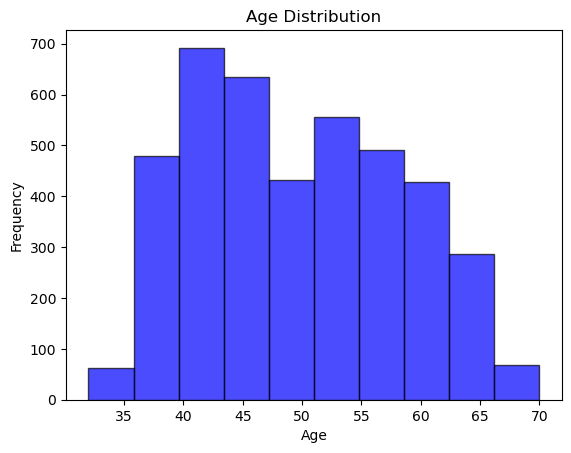

In [245]:
plt.hist(df['age'], bins=10, color='blue', alpha=0.7, edgecolor='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [246]:
# numeric attributes
n_cols = ['totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay']

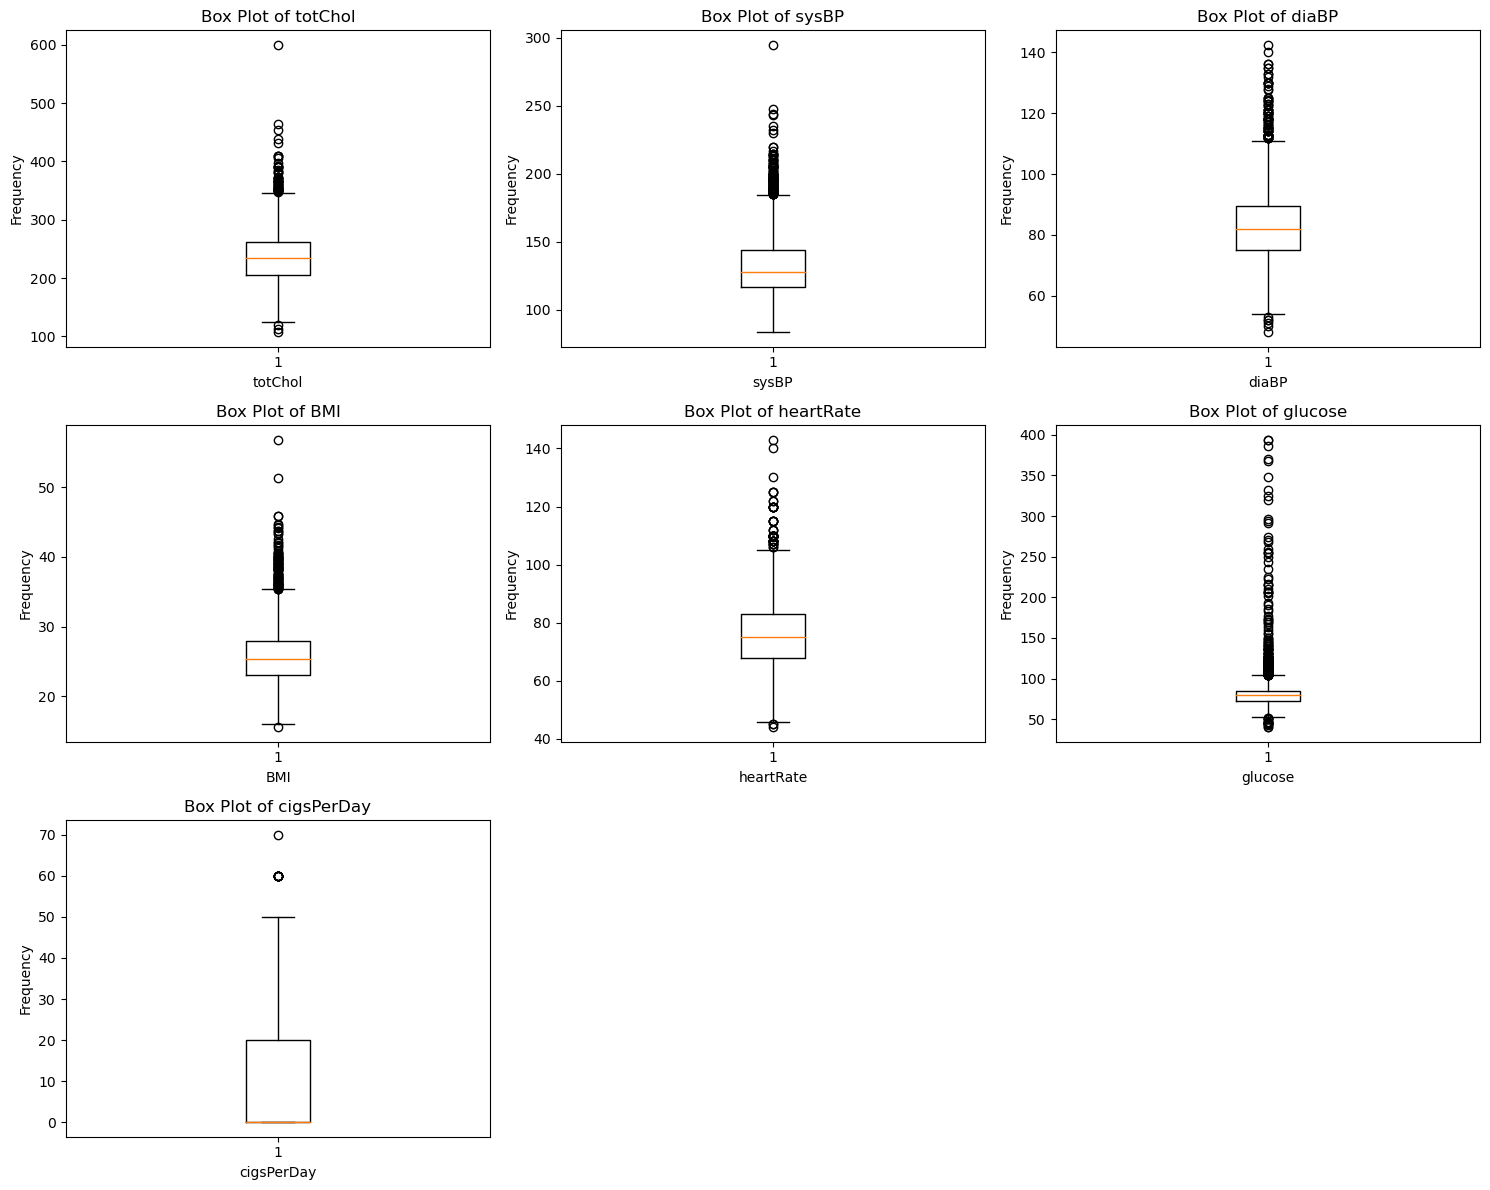

In [247]:
# Calculate the number of rows/columns needed for subplots
n_rows = int(np.ceil(len(n_cols) / 3))  # Adjust '3' to change number of columns per row

plt.figure(figsize=(15, n_rows * 4))  # Dynamic figure size

for i, col_name in enumerate(n_cols, 1):
    plt.subplot(n_rows, 3, i)  # Adjust '3' to match the number above
    plt.boxplot(df[col_name])
    plt.title(f"Box Plot of {col_name}")
    plt.xlabel(f"{col_name}")
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

In [248]:
# Categorical variables 
c_cols = ['male', 
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [249]:
c_cols

['male',
 'education',
 'currentSmoker',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [250]:
# Categorical variables that shows very imbalanced distribution. 
c_cols_1 = ['BPMeds','prevalentStroke','diabetes','TenYearCHD'] 

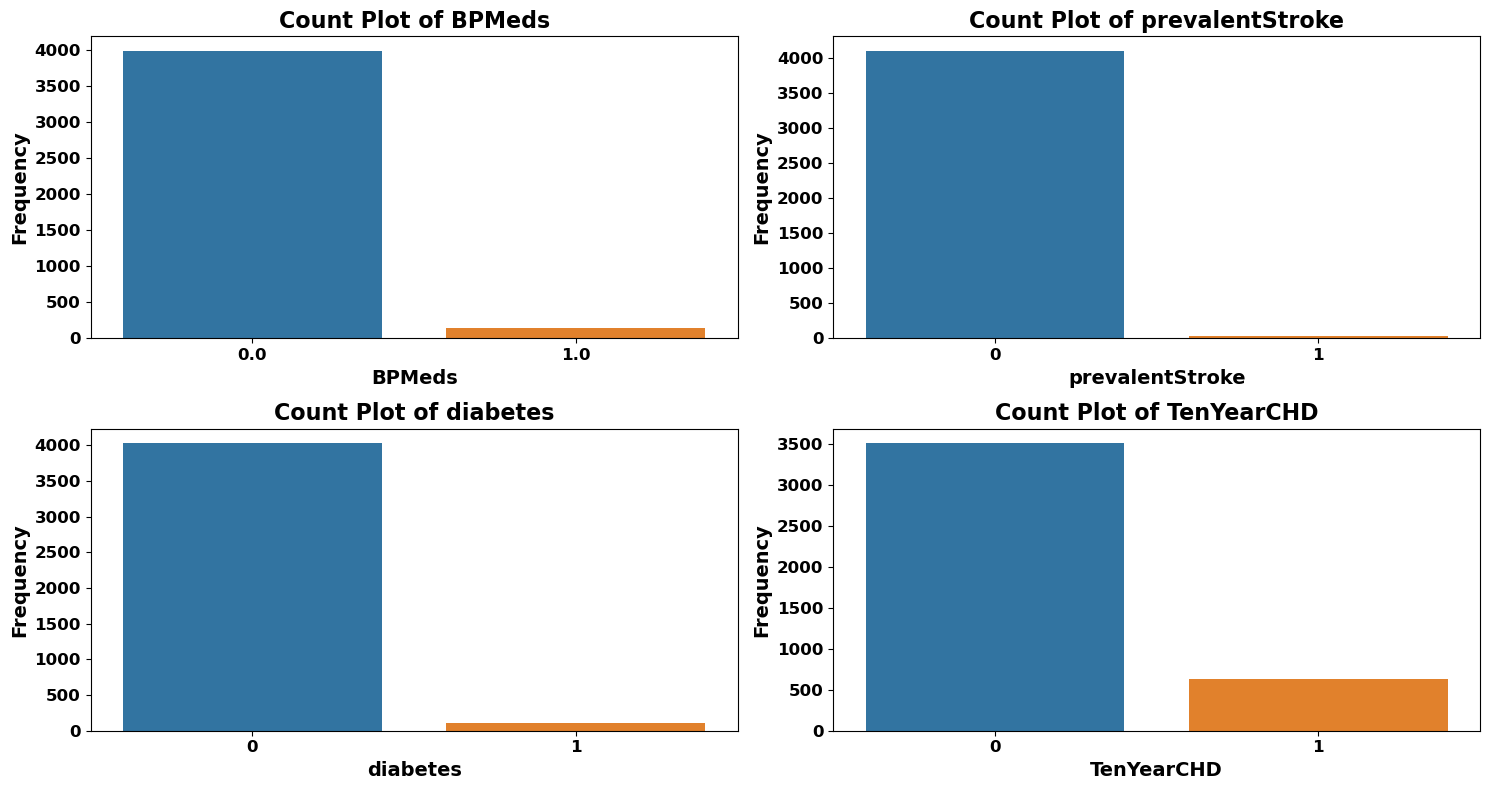

In [251]:
c_cols_1 = ['BPMeds', 'prevalentStroke', 'diabetes', 'TenYearCHD']

n_rows = int(np.ceil(len(c_cols_1) / 2))  # Calculate the number of rows needed for 2 plots per row

plt.figure(figsize=(15, n_rows * 4))  # Adjust the figure size accordingly

for i, col_name in enumerate(c_cols_1, 1):
    plt.subplot(n_rows, 2, i)  # Adjust subplot grid to 2 columns
    sns.countplot(x=col_name, data=df)  # Using seaborn for countplot
    plt.title(f"Count Plot of {col_name}", fontsize=16, fontweight='bold')  # Bigger and bold title
    plt.xlabel(col_name, fontsize=14, fontweight='bold')  # Bigger and bold xlabel
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')  # Bigger and bold ylabel
    
    # Set tick labels to be bigger and bold
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()  # Adjust layout
plt.show()

In [252]:
# Check to see if those variables are worth to keep or not
df.groupby(['prevalentStroke', 'TenYearCHD']).size().unstack()

TenYearCHD,0,1
prevalentStroke,,
0,3491,617
1,14,11


In [253]:
df.groupby(['BPMeds', 'TenYearCHD']).size().unstack()

TenYearCHD,0,1
BPMeds,,
0.0,3410,581
1.0,95,47


In [254]:
df.groupby(['diabetes', 'TenYearCHD']).size().unstack()

TenYearCHD,0,1
diabetes,,
0,3438,589
1,67,39


### 2) Chi Square

In [255]:
import scipy.stats as stats 

# Assuming df is your DataFrame and it contains the variables listed and 'TenYearCHD'

variables = [
    'male',
    'education',
    'currentSmoker',
    'BPMeds',
    'prevalentStroke',
    'prevalentHyp',
    'diabetes'
]

# Initialize an empty dictionary to hold p-values of the chi-square tests
chi_square_results = {}

for variable in variables:
    # Create a cross-tabulation table
    contingency_table = pd.crosstab(df[variable], df['TenYearCHD'])
    
    # Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Store the p-value in the dictionary
    chi_square_results[variable] = p

# Print the p-values
for variable, p_value in chi_square_results.items():
    print(f"{variable}: p-value = {p_value}")

male: p-value = 8.445518009017514e-08
education: p-value = 0.08677193780694227
currentSmoker: p-value = 0.307813794925101
BPMeds: p-value = 3.0439396684141497e-09
prevalentStroke: p-value = 0.00018041412053545043
prevalentHyp: p-value = 1.0305326504668787e-30
diabetes: p-value = 8.33709126803555e-10


### A low p-value (typically ≤ 0.05) indicates that the association between the variable and the target variable is statistically significant.
### A high p-value (> 0.05) suggests that there is no statistically significant association.

In [256]:
# Initialize lists to hold significant and non-significant variables
significant_variables = []
non_significant_variables = []

for variable, p_value in chi_square_results.items():
    if p_value <= 0.05:
        significant_variables.append(variable)
    else:
        non_significant_variables.append(variable)

# Print out the results
print("Significant Variables based on Chi-square Test (alpha = 0.05):")
for variable in significant_variables:
    print(variable)

print("\nNon-Significant Variables:")
for variable in non_significant_variables:
    print(variable)

Significant Variables based on Chi-square Test (alpha = 0.05):
male
BPMeds
prevalentStroke
prevalentHyp
diabetes

Non-Significant Variables:
education
currentSmoker


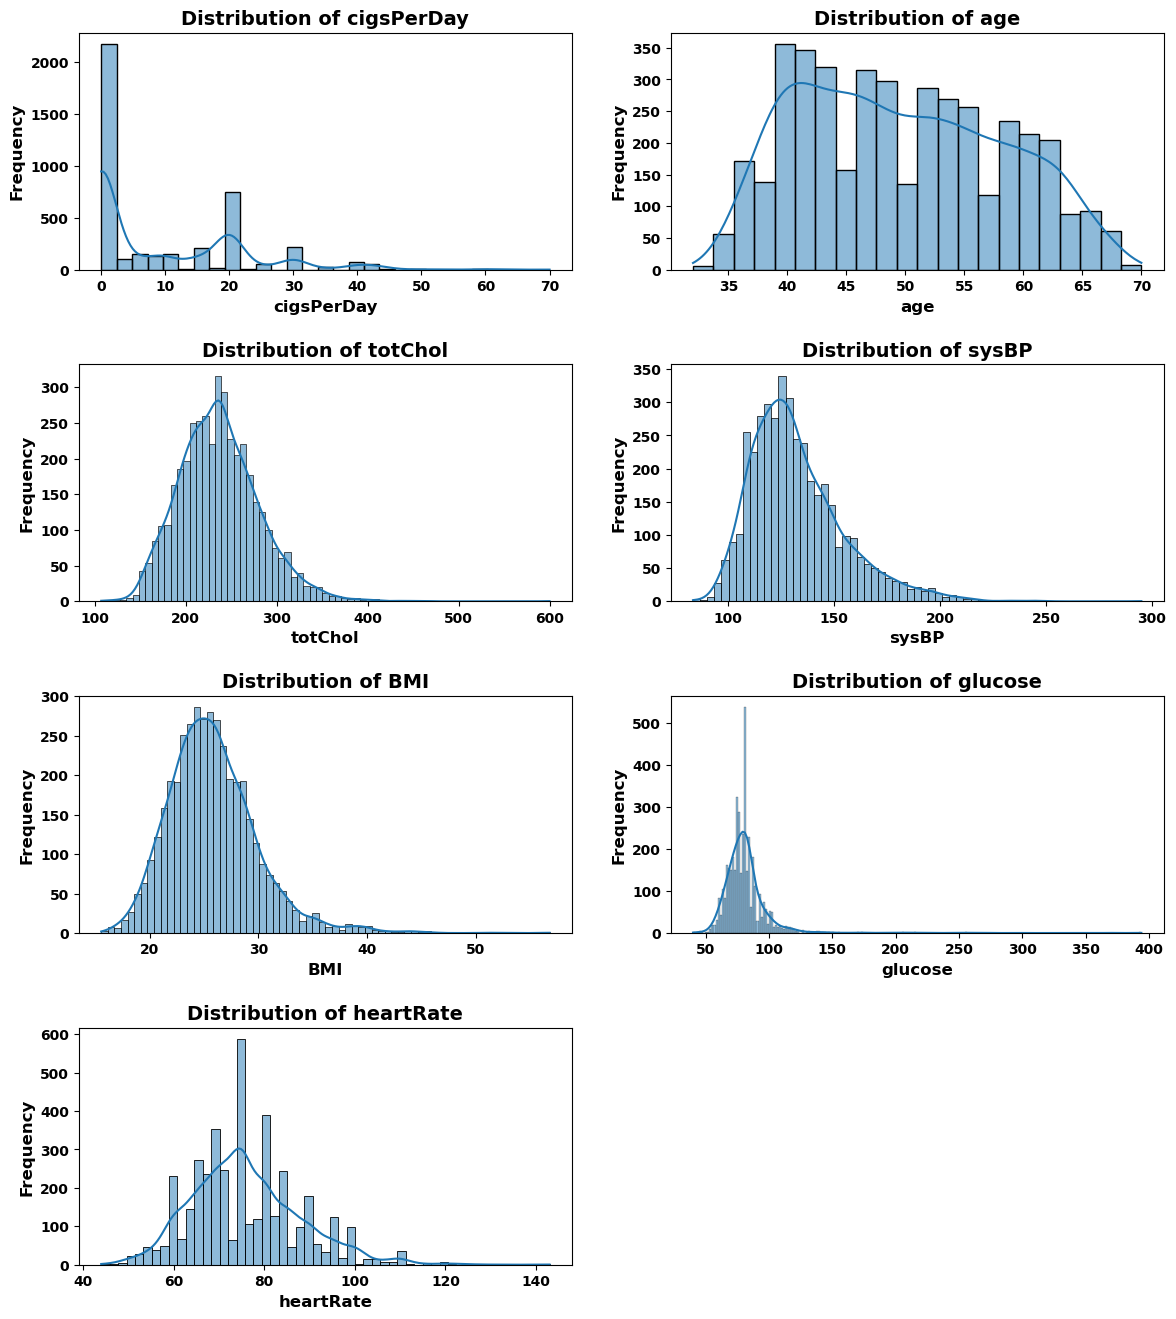

In [257]:
# Numerical variables distributions
fig, ax = plt.subplots(4, 2, figsize=(14, 16), gridspec_kw={"hspace": 0.4})  

variables_to_plot = ['cigsPerDay', 'age', 'totChol', 'sysBP', 'BMI', 'glucose', 'heartRate']
for i, var in enumerate(variables_to_plot):
    row = i // 2
    col = i % 2
    sns.histplot(df[var], kde=True, ax=ax[row, col])
    ax[row, col].set_title(f'Distribution of {var}', fontsize=14, fontweight='bold')
    ax[row, col].set_xlabel(var, fontsize=12, fontweight='bold')
    ax[row, col].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    
    for label in (ax[row, col].get_xticklabels() + ax[row, col].get_yticklabels()):
        label.set_fontweight('bold')
        label.set_fontsize(10)

if len(variables_to_plot) < ax.size:
    for i in range(len(variables_to_plot), ax.size):
        ax.flatten()[i].remove()

plt.subplots_adjust(hspace=0.4)
plt.show()

In [258]:
df['cigsPerDay'].value_counts()

cigsPerDay
0.0     2088
20.0     747
30.0     213
15.0     207
10.0     140
9.0      125
5.0      117
3.0       98
40.0      78
1.0       65
43.0      56
25.0      51
35.0      22
6.0       18
2.0       17
7.0       12
8.0       11
60.0      10
18.0       8
4.0        8
17.0       7
50.0       6
11.0       5
23.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: count, dtype: int64

In [259]:
df['currentSmoker'].value_counts() # 0 matches the counts above - confirming the data

currentSmoker
0    2088
1    2045
Name: count, dtype: int64

In [260]:
df['prevalentStroke'].value_counts() # only a few people have high had stoke before \
#we might wnat to check the difference between people had stroke before and not

prevalentStroke
0    4108
1      25
Name: count, dtype: int64

In [261]:
df['diabetes'].value_counts() # only a few people have diabetes.

diabetes
0    4027
1     106
Name: count, dtype: int64

### 3) Correlation

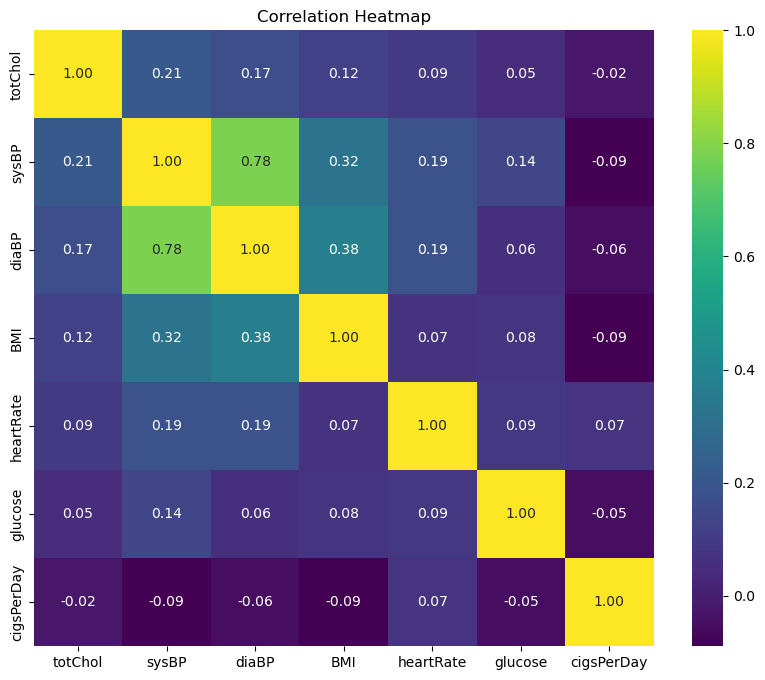

In [262]:
# Correlation with continous attributes
# Selecting the numeric columns for the correlation analysis
n_cols_df = df[n_cols]

# Calculating the correlation matrix
corr_matrix = n_cols_df.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [263]:
# VIF from R (less than 10 : no correlation)
# > vif(model)
#            male             age       education   currentSmoker      cigsPerDay 
#        1.198498        1.356255        1.026340        2.561237        2.699904 
#          BPMeds prevalentStroke    prevalentHyp        diabetes         totChol 
#        1.115104        1.020592        2.058312        1.582344        1.111583 
#           sysBP           diaBP             BMI       heartRate         glucose 
#        3.741963        2.971938        1.225777        1.096229        1.604370


### 4) Outlier Removal

In [264]:
# Outlier removal for numerical variables(z_score over 3)
from scipy.stats import zscore
df_zscore = df[['cigsPerDay', 'age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']].apply(zscore)

df_is_outlier = ((df_zscore > 3) | (df_zscore < -3))
print(df_is_outlier.sum().sum())
print(df_is_outlier.sum()/len(df)) # proportions of outliers in each column

condition = df_is_outlier.any(axis=1)
df = df.loc[~condition, :].copy()
len(df)

260
cigsPerDay    0.004839
age           0.000000
totChol       0.005807
sysBP         0.011614
diaBP         0.009920
BMI           0.014275
heartRate     0.004839
glucose       0.011614
dtype: float64


3913

### 5) PCA plots

In [265]:
from sklearn.preprocessing import StandardScaler

numeric_col = ['cigsPerDay', 'age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
cate_col = ['male', 'education', 'currentSmoker', 'prevalentStroke', 'BPMeds', 'prevalentHyp', 'diabetes']
X = df.drop(columns=['TenYearCHD'])  # Using your actual target column name
X[numeric_col] = StandardScaler().fit(X[numeric_col]).transform(X[numeric_col])
y = df['TenYearCHD']

[0.27342679 0.14592886 0.11471271]


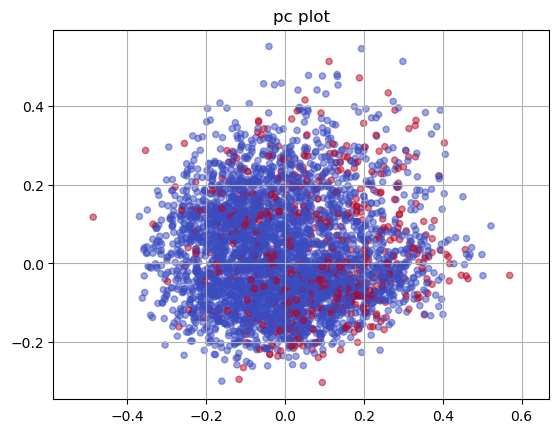

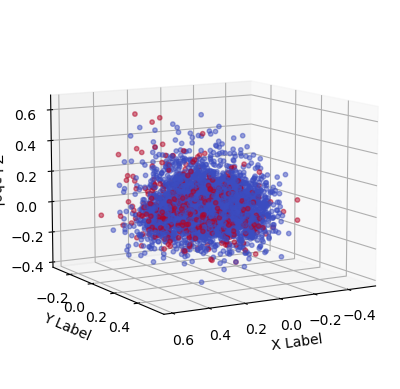

In [266]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X_pca = X.astype({"male":"object", "education":"object", "currentSmoker":"object", "BPMeds":"object", "prevalentStroke":"object", "prevalentHyp":"object", "diabetes":"object"})

numerical_X_pca = X.select_dtypes(include=['int64', 'float64']).columns

#X[X.columns] = StandardScaler().fit(X[X.columns]).transform(X[X.columns])  We Do not want to scale categorical varialbes!!

pca = PCA(n_components=3)
pc = pca.fit(X).transform(X)
print(pca.explained_variance_ratio_)

pc_full = X.values @ pca.components_.T @ np.diag(1/np.sqrt(pca.singular_values_))

plt.figure()
plt.scatter(pc_full[:,0], pc_full[:,1], alpha = 0.5, c=y, s=20, cmap ="coolwarm")
plt.axis('equal')
plt.grid()
plt.title('pc plot')
plt.show() 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc_full[:,0], pc_full[:,1], pc_full[:,2], s=10, c=y, alpha = 0.5, cmap ="coolwarm")
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(elev=10, azim=60) 
plt.show()


## 3. Feature selection

### 1) LASSO

In [267]:
from sklearn.linear_model import LassoCV 
from sklearn.linear_model import Lasso 

lasso_model = LassoCV(cv=100, random_state=42, max_iter=10000)

lasso_model.fit(X, y) 
opt_alpha = lasso_model.alpha_ 
print(f'The optimal lambda : {opt_alpha}') 

lasso_opt_model = Lasso(alpha=opt_alpha)
lasso_opt_model.fit(X, y) 

lasso_coef_result = {"variable" :list(X.columns), "coef":lasso_opt_model.coef_,}
pd.DataFrame(lasso_coef_result)

The optimal lambda : 0.001649641584539932


,variable,coef
0,male,0.043172
1,age,0.063819
2,education,0.000000
3,currentSmoker,-0.000000
4,cigsPerDay,0.028516
5,BPMeds,0.000000
6,prevalentStroke,0.000000
7,prevalentHyp,0.031499
8,diabetes,0.000000
9,totChol,-0.000000


In [268]:
# Selected variables from lasso
lasso_coef_dict = {var: coef for var, coef in zip(lasso_coef_result["variable"], lasso_coef_result["coef"])}
selected_features_lasso = set(X.columns)-set([var for var, coef in lasso_coef_dict.items() if coef == 0])
selected_features_lasso

{'age', 'cigsPerDay', 'diaBP', 'glucose', 'male', 'prevalentHyp', 'sysBP'}

In [269]:
# Optimal lambda with selected variables on Logistic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

X_lasso = X.drop(columns=selected_features_lasso)
X_lasso_numeric = X_lasso.select_dtypes(include=['int64', 'float64']).columns 

lasso_result = []

np.random.seed(42)

for c in range(50) :
    X_train, X_test, y_train, y_test = train_test_split(X_lasso, y, train_size = 0.8, test_size=0.2)

    X_train[X_lasso_numeric] = StandardScaler().fit(X_train[X_lasso_numeric]).transform(X_train[X_lasso_numeric]) 
    X_test[X_lasso_numeric] = StandardScaler().fit(X_test[X_lasso_numeric]).transform(X_test[X_lasso_numeric]) 
    
    logit = LogisticRegression()
    lasso_logit_fit = logit.fit(X_train, y_train).predict(X_test)
    lasso_logit_acu = accuracy_score(y_test, lasso_logit_fit)
    lasso_result.append(lasso_logit_acu)

np.mean(lasso_result)

0.8578544061302682

### 2) Select K Best

In [270]:
# Select K Best
from sklearn.feature_selection import SelectKBest

kselect = len(X.columns)
kselect_result = {"round":[], "k":[], "variables":[], "logit_roc":[]}

np.random.seed(42)

for c in range(50) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2)

    X_train[numeric_col] = StandardScaler().fit(X_train[numeric_col]).transform(X_train[numeric_col]) 
    X_test[numeric_col] = StandardScaler().fit(X_test[numeric_col]).transform(X_test[numeric_col]) 
    
    for k in range(kselect) :
        selector  = SelectKBest(k=k+1)  
        K_best_new = selector.fit_transform(X_train, y_train)
        selected_mask = selector.get_support()
        kselect_result["round"].append(c)
        kselect_result["k"].append(k)
        kselect_result["variables"].append(list(set(X_train.columns) - set(X_train.columns[selected_mask])))

        X_train_selected, X_test_selected = X_train[X_train.columns[selected_mask]], X_test[X_test.columns[selected_mask]]
        logit = LogisticRegression()
        kselect_logit_fit = logit.fit(X_train_selected, y_train).predict(X_test_selected)
        kselect_logit_acu = accuracy_score(y_test, kselect_logit_fit)
        kselect_result["logit_roc"].append(kselect_logit_acu)

#kselect_result

In [271]:
pd.DataFrame(kselect_result).groupby(["k"])["logit_roc"].mean()

k
0     0.858646
1     0.858391
2     0.858544
3     0.858621
4     0.858008
5     0.858519
6     0.858646
7     0.859949
8     0.860536
9     0.861379
10    0.861916
11    0.862120
12    0.862146
13    0.862248
14    0.862069
Name: logit_roc, dtype: float64

In [272]:
# Non-selected variables from the best k number model
pd.DataFrame(kselect_result).groupby("k").get_group(13)["variables"].value_counts() 

variables
[heartRate]        38
[currentSmoker]     8
[education]         4
Name: count, dtype: int64

In [273]:
col_map = {ind:var for ind, var in enumerate(X.columns, 1)}
col_map

{1: 'male',
 2: 'age',
 3: 'education',
 4: 'currentSmoker',
 5: 'cigsPerDay',
 6: 'BPMeds',
 7: 'prevalentStroke',
 8: 'prevalentHyp',
 9: 'diabetes',
 10: 'totChol',
 11: 'sysBP',
 12: 'diaBP',
 13: 'BMI',
 14: 'heartRate',
 15: 'glucose'}

### 3) RandomForestClassifier

<Axes: xlabel='Features'>

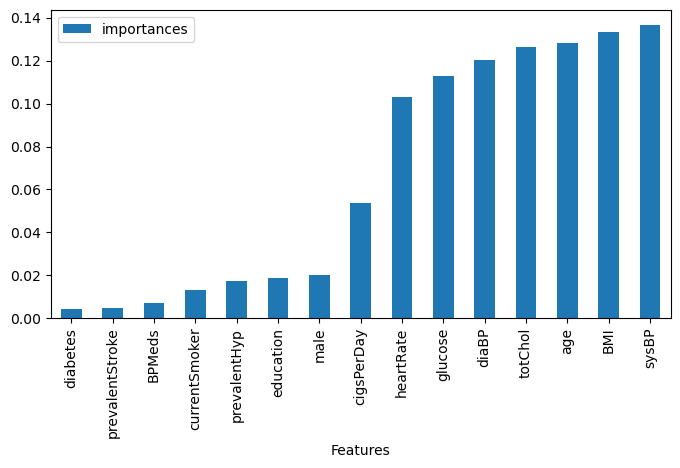

In [274]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_
importance_df = pd.DataFrame({"Features":pd.DataFrame(X).columns, 'importances': importances})
importance_df.set_index('importances')
importance_df = importance_df.sort_values('importances')
importance_df.plot.bar(x='Features', y='importances', figsize=(8, 4))

In [275]:
importance_df_sorted = importance_df.sort_values('importances', ascending=False)
top_3_least_important_features = importance_df_sorted.tail(3)['Features'].tolist()
top_3_least_important_features

['BPMeds', 'prevalentStroke', 'diabetes']

In [276]:
# Checking the performance on Logistic without top 3 least important features
X_rf = X.drop(columns=top_3_least_important_features)
X_rf_numeric = X_rf.select_dtypes(include=['int64', 'float64']).columns 

rf_result = []

np.random.seed(42)

for c in range(50) :
    X_train, X_test, y_train, y_test = train_test_split(X_rf, y, train_size = 0.8, test_size=0.2)

    X_train[X_rf_numeric] = StandardScaler().fit(X_train[X_rf_numeric]).transform(X_train[X_rf_numeric]) 
    X_test[X_rf_numeric] = StandardScaler().fit(X_test[X_rf_numeric]).transform(X_test[X_rf_numeric]) 
    
    logit = LogisticRegression()
    rf_logit_fit = logit.fit(X_train, y_train).predict(X_test)
    rf_logit_acu = accuracy_score(y_test, rf_logit_fit)
    rf_result.append(rf_logit_acu)

np.mean(rf_result)

0.8616347381864624

### 4) Backward Elimination

In [277]:
from sklearn.feature_selection import SequentialFeatureSelector

logit = LogisticRegression()
sfs = SequentialFeatureSelector(logit, direction="backward", scoring='accuracy', n_features_to_select='auto', cv=5)
sfs_fit = sfs.fit(X, y)

sfs_fit.get_feature_names_out()

array(['male', 'age', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp',
       'sysBP', 'heartRate', 'glucose'], dtype=object)

In [278]:
# Non-selected features
set(X.columns)-set(list(sfs_fit.get_feature_names_out()))

{'BMI', 'BPMeds', 'currentSmoker', 'diaBP', 'diabetes', 'education', 'totChol'}

In [279]:
# Checking the performance on Logistic without those important features

X_sfs = X[sfs_fit.get_feature_names_out()]
X_sfs_numeric = X_sfs.select_dtypes(include=['int64', 'float64']).columns

sfs_result = []

np.random.seed(42)

for c in range(50) :
#     X_train, X_test, y_train, y_test = train_test_split(X_Sales_Kbest, y_Sales, train_size = 0.8, test_size=0.2)
    X_train, X_test, y_train, y_test = train_test_split(X_sfs, y, train_size = 0.8, test_size=0.2)

    X_train[X_sfs_numeric] = StandardScaler().fit(X_train[X_sfs_numeric]).transform(X_train[X_sfs_numeric]) 
    X_test[X_sfs_numeric] = StandardScaler().fit(X_test[X_sfs_numeric]).transform(X_test[X_sfs_numeric]) 
    
    logit = LogisticRegression()
    sfs_logit_fit = logit.fit(X_train, y_train).predict(X_test)
    sfs_logit_acu = accuracy_score(y_test, sfs_logit_fit)
    sfs_result.append(sfs_logit_acu)

np.mean(sfs_result)

0.861941251596424

### 5) Using All Variables

In [280]:
all_result = []

np.random.seed(42)

for c in range(50) :
#     X_train, X_test, y_train, y_test = train_test_split(X_Sales_Kbest, y_Sales, train_size = 0.8, test_size=0.2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2)

    X_train[numeric_col] = StandardScaler().fit(X_train[numeric_col]).transform(X_train[numeric_col]) 
    X_test[numeric_col] = StandardScaler().fit(X_test[numeric_col]).transform(X_test[numeric_col]) 
    
    logit = LogisticRegression()
    all_logit_fit = logit.fit(X_train, y_train).predict(X_test)
    all_logit_acu = accuracy_score(y_test, all_logit_fit)
    all_result.append(all_logit_acu)

np.mean(all_result)

0.8620689655172414

### So far Select K Best result gives the best performance. Considering the Chi-square result with this, we can rule out variables such as 'currentSmoker', 'heartRate, 'education'.

In [281]:
X = X.drop(columns = ['currentSmoker', 'education','heartRate'])

## 4. SMOTE & SMOTENC

In [282]:
cate_col = ['male', 'prevalentStroke', 'BPMeds', 'prevalentHyp', 'diabetes']
X[cate_col] = X[cate_col].astype("object")
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3913 entries, 0 to 4132
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3913 non-null   object 
 1   age              3913 non-null   float64
 2   cigsPerDay       3913 non-null   float64
 3   BPMeds           3913 non-null   object 
 4   prevalentStroke  3913 non-null   object 
 5   prevalentHyp     3913 non-null   object 
 6   diabetes         3913 non-null   object 
 7   totChol          3913 non-null   float64
 8   sysBP            3913 non-null   float64
 9   diaBP            3913 non-null   float64
 10  BMI              3913 non-null   float64
 11  glucose          3913 non-null   float64
dtypes: float64(7), object(5)
memory usage: 397.4+ KB


In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2)

In [284]:
y_train.value_counts()

TenYearCHD
0    2689
1     441
Name: count, dtype: int64

In [285]:
# Find categorical column indices for SMOTENC
smotenc_cate_feature = [ind for ind, tf in enumerate(X_train.dtypes == object) if tf == True]
smotenc_cate_feature

[0, 3, 4, 5, 6]

In [286]:
from imblearn.pipeline import Pipeline 
# from sklearn.pipeline import Pipeline # error
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report

weights = list(np.arange(0.19, 1.0, 0.05))

In [287]:
smote_pipe = Pipeline([('smote', SMOTE(random_state=42)), ('logit', LogisticRegression())])

gcv = GridSearchCV(estimator = smote_pipe, param_grid = {'smote__sampling_strategy' : weights}, scoring = 'accuracy', cv = 3, error_score='raise')

gcv_result = gcv.fit(X_train, y_train)
print(gcv_result.best_params_)

{'smote__sampling_strategy': 0.19}


In [288]:
sm = SMOTE(random_state=42, sampling_strategy=gcv_result.best_params_['smote__sampling_strategy'])
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
logit = LogisticRegression().fit(X_train_smt, y_train_smt)
print(sm.sampling_strategy_)
print(y_train_smt.value_counts())
logit_predictions = logit.predict(X_test)

logit_smt = accuracy_score(y_test, logit_predictions)
print(f"Logistic Regression accuracy: {logit_smt}")
print(classification_report(y_test, logit_predictions))

OrderedDict([(1, 69)])
TenYearCHD
0    2689
1     510
Name: count, dtype: int64
Logistic Regression accuracy: 0.8620689655172413
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       675
           1       0.50      0.04      0.07       108

    accuracy                           0.86       783
   macro avg       0.68      0.52      0.50       783
weighted avg       0.82      0.86      0.81       783



In [289]:
smotenc_pipe = Pipeline([('smotenc', SMOTENC(random_state=42, categorical_features =smotenc_cate_feature)), ('logit', LogisticRegression())])

gcv1 = GridSearchCV(estimator = smotenc_pipe, param_grid = {'smotenc__sampling_strategy' : weights}, scoring = 'accuracy', cv = 3, error_score='raise')

gcv_result1 = gcv1.fit(X_train, y_train)
print(gcv_result1.best_params_)

{'smotenc__sampling_strategy': 0.19}


In [290]:
smnc = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, sampling_strategy=gcv_result1.best_params_['smotenc__sampling_strategy'])
X_train_smt, y_train_smt = smnc.fit_resample(X_train, y_train)
logit = LogisticRegression().fit(X_train_smt, y_train_smt)
print(smnc.sampling_strategy_)
print(y_train_smt.value_counts())
logit_predictions = logit.predict(X_test)

logit_smt = accuracy_score(y_test, logit_predictions)
print(f"Logistic accuracy: {logit_smt}")

OrderedDict([(1, 69)])
TenYearCHD
0    2689
1     510
Name: count, dtype: int64
Logistic accuracy: 0.8633461047254151


## 5. Modeling

In [291]:
# Creating Dictionary to save accuracy 
score_dic = {"model":[],"Accuracy":[]}

In [292]:
score_dic

{'model': [], 'Accuracy': []}

### 1) Random Forest Classification 

In [293]:
# Let's start by splitting the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

# Assuming the last column is the target variable. Adjust if necessary.
# X = df.drop(columns=['TenYearCHD'])  # Replace 'target' with the actual name of your target column
# y = df['TenYearCHD']  # Replace 'target' with the actual name of your target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Random Forest
from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier(random_state=42)


# SMOTE
sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, sampling_strategy=gcv_result1.best_params_['smotenc__sampling_strategy'])
# sm = SMOTE(random_state=42, sampling_strategy=gcv_result.best_params_['smote__sampling_strategy'])
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)


rf_classifier.fit(X_train_smt, y_train_smt)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest accuracy: {rf_accuracy}")

Random Forest accuracy: 0.8722316865417377


Random Forest accuracy: 0.8722316865417377
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1021
           1       0.60      0.06      0.11       153

    accuracy                           0.87      1174
   macro avg       0.74      0.53      0.52      1174
weighted avg       0.84      0.87      0.82      1174



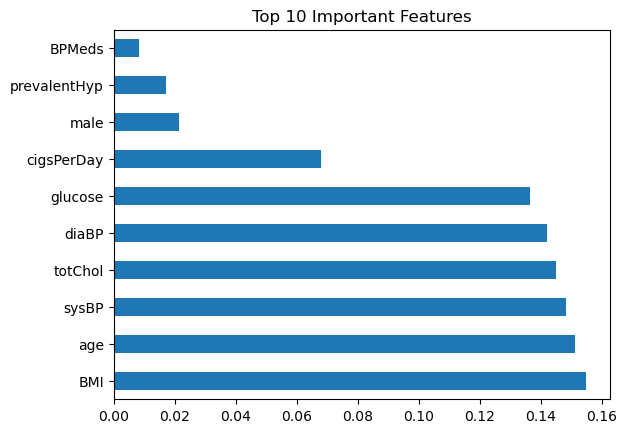

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into training and testing sets
# X = df.drop(columns=['TenYearCHD'])  # Using your actual target column name
# y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Random Forest with improved parameter tuning
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)


# SMOTE
sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, sampling_strategy=gcv_result1.best_params_['smotenc__sampling_strategy'])
# sm = SMOTE(random_state=42, sampling_strategy=gcv_result.best_params_['smote__sampling_strategy'])
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)



rf_classifier.fit(X_train_smt, y_train_smt)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate performance with accuracy, classification report, and confusion matrix
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest accuracy: {rf_accuracy}")

# Additional performance metrics
print(classification_report(y_test, rf_predictions))

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, rf_predictions)
# plt.figure(figsize=(6,6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, cmap='Blues')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

# Feature Importance
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()


In [295]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 'TenYearCHD' is the target variable
# X = df.drop(columns=['TenYearCHD'])
# y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')



# SMOTE
sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, sampling_strategy=gcv_result1.best_params_['smotenc__sampling_strategy'])
# sm = SMOTE(random_state=42, sampling_strategy=gcv_result.best_params_['smote__sampling_strategy'])
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)


# Fit the grid search to the data
grid_search.fit(X_train_smt, y_train_smt)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
rf_predictions = best_rf.predict(X_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Improved Random Forest accuracy with GridSearchCV: {rf_accuracy}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Improved Random Forest accuracy with GridSearchCV: 0.8722316865417377


In [296]:
score_dic["model"].append("Random_Forest")
score_dic["Accuracy"].append(rf_accuracy)

In [297]:
score_dic

{'model': ['Random_Forest'], 'Accuracy': [0.8722316865417377]}

### 2) Boosting 

In [298]:
# Apply Boosting - using Gradient Boosting as an example
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=42)



# SMOTE
sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, sampling_strategy=gcv_result1.best_params_['smotenc__sampling_strategy'])
# sm = SMOTE(random_state=42, sampling_strategy=gcv_result.best_params_['smote__sampling_strategy'])
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)



gb_classifier.fit(X_train_smt, y_train_smt)
gb_predictions = gb_classifier.predict(X_test)

# Evaluate performance
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Gradient Boosting accuracy: {gb_accuracy}")


Gradient Boosting accuracy: 0.8696763202725724


In [299]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Shrinks the contribution of each tree
    'max_depth': [3, 5, 8],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')



# SMOTE
sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, sampling_strategy=gcv_result1.best_params_['smotenc__sampling_strategy'])
# sm = SMOTE(random_state=42, sampling_strategy=gcv_result.best_params_['smote__sampling_strategy'])
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)



# Fit the grid search to the data
grid_search_gb.fit(X_train_smt, y_train_smt)

# Print the best parameters
print("Best parameters found for Gradient Boosting: ", grid_search_gb.best_params_)

# Use the best estimator to make predictions
best_gb = grid_search_gb.best_estimator_
gb_predictions = best_gb.predict(X_test)

# Evaluate performance
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Improved Gradient Boosting accuracy with GridSearchCV: {gb_accuracy}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found for Gradient Boosting:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Improved Gradient Boosting accuracy with GridSearchCV: 0.8739352640545145


In [300]:
score_dic["model"].append("Boosting")
score_dic["Accuracy"].append(gb_accuracy)

In [301]:
score_dic

{'model': ['Random_Forest', 'Boosting'],
 'Accuracy': [0.8722316865417377, 0.8739352640545145]}

### 3) Logistic Regression

In [302]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)
log_reg = LogisticRegression(max_iter=1000)


# SMOTE
sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, sampling_strategy=gcv_result1.best_params_['smotenc__sampling_strategy'])
# sm = SMOTE(random_state=42, sampling_strategy=gcv_result.best_params_['smote__sampling_strategy'])
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)


log_reg.fit(X_train_smt, y_train_smt)
log_reg_predictions = log_reg.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print(f"Logistic Regression accuracy: {log_reg_accuracy}")

Logistic Regression accuracy: 0.8773424190800682


In [303]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline that scales the data then fits the logistic regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Define the parameter grid to search over
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'logreg__solver': ['liblinear', 'lbfgs']  # Algorithm to use in the optimization problem
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')



# SMOTE
sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, sampling_strategy=gcv_result1.best_params_['smotenc__sampling_strategy'])
# sm = SMOTE(random_state=42, sampling_strategy=gcv_result.best_params_['smote__sampling_strategy'])
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)



# Fit the grid search to the data
grid_search.fit(X_train_smt, y_train_smt)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_estimator = grid_search.best_estimator_
log_reg_predictions = best_estimator.predict(X_test)

# Evaluate performance
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print(f"Improved Logistic Regression accuracy with GridSearchCV: {log_reg_accuracy}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'logreg__C': 0.01, 'logreg__solver': 'liblinear'}
Improved Logistic Regression accuracy with GridSearchCV: 0.8756388415672913


In [304]:
score_dic["model"].append("Logistic_Regression")
score_dic["Accuracy"].append(log_reg_accuracy)

### 4) KNN

Best parameters found:  {'knn__n_neighbors': 30}
Best cross-validation score: 0.86
Test set accuracy with best KNN: 0.8696763202725724
Best parameters found with SMT:  {'knn__n_neighbors': 24}
Best cross-validation score: 0.84
Test set accuracy with best KNN with SMT: 0.8696763202725724


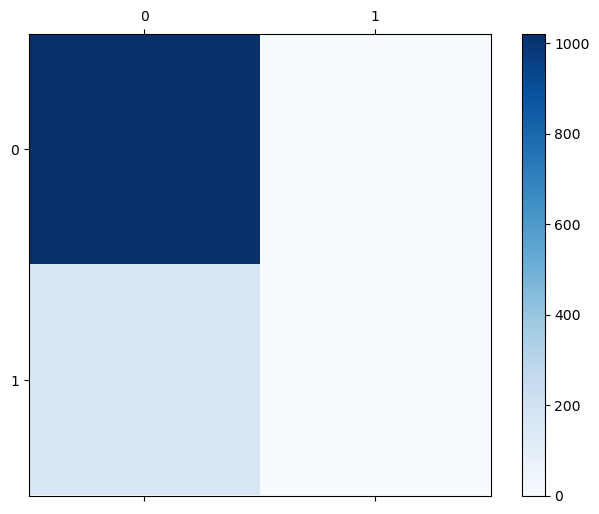

In [305]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a pipeline that includes scaling and the KNN classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'knn__n_neighbors': range(1, 31)
}

# Initialize GridSearchCV with the pipeline and the parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)



# Not modified sample KNN

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score obtained from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Use the best estimator to make predictions on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate the model performance on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with best KNN: {test_accuracy}")

#-----------------------------------------------------------------------------------------------------

# SMOTE
sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, sampling_strategy=gcv_result1.best_params_['smotenc__sampling_strategy'])
# sm = SMOTE(random_state=42, sampling_strategy=gcv_result.best_params_['smote__sampling_strategy'])
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_smt, y_train_smt)

# Print the best parameters and the best score obtained from GridSearchCV
print("Best parameters found with SMT: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Use the best estimator to make predictions on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate the model performance on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with best KNN with SMT: {test_accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))

# Use 'imshow' instead of 'heatmap'
cax = ax.matshow(conf_matrix, cmap='Blues')

# # Add annotations to each cell
# for (i, j), value in np.ndenumerate(conf_matrix):
#     ax.text(j, i, f'{value:0.0f}', ha='center', va='center', color='black')

# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')

# Add color bar
plt.colorbar(cax)

plt.show()


In [306]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1021    0]
 [ 153    0]]


In [307]:
score_dic["model"].append("KNN")
score_dic["Accuracy"].append(test_accuracy)

### 5) SVM

In [308]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


# Create a pipeline that scales the data then fits the SVM model
pipeline = make_pipeline(StandardScaler(), SVC(random_state=42))

# Define the parameter grid for SVM
param_grid_svm = {
    'svc__C': [0.1, 1, 10],  # Regularization parameter
    'svc__kernel': ['linear', 'rbf', 'poly'],  # Type of SVM Kernel
    'svc__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
}

# Initialize the GridSearchCV object
grid_search_svm = GridSearchCV(estimator=pipeline, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


# SMOTE
sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, sampling_strategy=gcv_result1.best_params_['smotenc__sampling_strategy'])
# sm = SMOTE(random_state=42, sampling_strategy=gcv_result.best_params_['smote__sampling_strategy'])
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)



# Fit the grid search to the data
grid_search_svm.fit(X_train_smt, y_train_smt)

# Print the best parameters
print("Best parameters found for SVM: ", grid_search_svm.best_params_)

# Use the best estimator to make predictions
best_svm = grid_search_svm.best_estimator_
svm_predictions = best_svm.predict(X_test)




# Evaluate performance
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM accuracy with GridSearchCV: {svm_accuracy}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found for SVM:  {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
SVM accuracy with GridSearchCV: 0.8696763202725724


In [309]:
score_dic["model"].append("SVM")
score_dic["Accuracy"].append(svm_accuracy)

### 6) LDA

In [310]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Create a pipeline that scales the data then fits the LDA model
pipeline_lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())

# SMOTE
sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, sampling_strategy=gcv_result1.best_params_['smotenc__sampling_strategy'])
# sm = SMOTE(random_state=42, sampling_strategy=gcv_result.best_params_['smote__sampling_strategy'])
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)


# No hyperparameters to tune for basic LDA, so we can directly fit and evaluate the model
pipeline_lda.fit(X_train_smt, y_train_smt)

# Make predictions and evaluate the model
lda_predictions = pipeline_lda.predict(X_test)

# Evaluate performance
lda_accuracy = accuracy_score(y_test, lda_predictions)
print(f"LDA accuracy: {lda_accuracy}")



LDA accuracy: 0.8781942078364565


In [311]:
score_dic["model"].append("LDA")
score_dic["Accuracy"].append(lda_accuracy)

### 7) MLP

In [312]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42, learning_rate_init = 0.01, hidden_layer_sizes = (40, 10), max_iter = 500, tol=1e-2)

# SMOTE
sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, sampling_strategy=gcv_result1.best_params_['smotenc__sampling_strategy'])
# sm = SMOTE(random_state=42, sampling_strategy=gcv_result.best_params_['smote__sampling_strategy'])
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)

# No hyperparameters to tune for basic LDA, so we can directly fit and evaluate the model
mlp.fit(X_train_smt, y_train_smt)

# Make predictions and evaluate the model
mlp_predictions = mlp.predict(X_test)

# Evaluate performance
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print(f"MLP accuracy: {mlp_accuracy}")
print(classification_report(y_test, mlp_predictions))

MLP accuracy: 0.8696763202725724
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1021
           1       0.00      0.00      0.00       153

    accuracy                           0.87      1174
   macro avg       0.43      0.50      0.47      1174
weighted avg       0.76      0.87      0.81      1174



C:\Users\taewu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\taewu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\taewu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [313]:
score_dic["model"].append("MLP")
score_dic["Accuracy"].append(mlp_accuracy)

In [314]:
score_dic

{'model': ['Random_Forest',
  'Boosting',
  'Logistic_Regression',
  'KNN',
  'SVM',
  'LDA',
  'MLP'],
 'Accuracy': [0.8722316865417377,
  0.8739352640545145,
  0.8756388415672913,
  0.8696763202725724,
  0.8696763202725724,
  0.8781942078364565,
  0.8696763202725724]}

In [315]:
df_scores = pd.DataFrame(score_dic)

In [316]:
df_scores

,model,Accuracy
0,Random_Forest,0.872232
1,Boosting,0.873935
2,Logistic_Regression,0.875639
3,KNN,0.869676
4,SVM,0.869676
5,LDA,0.878194
6,MLP,0.869676


In [317]:
df_scores_sorted = df_scores.sort_values(by='Accuracy', ascending=False)

In [318]:
df_scores_sorted

,model,Accuracy
5,LDA,0.878194
2,Logistic_Regression,0.875639
1,Boosting,0.873935
0,Random_Forest,0.872232
3,KNN,0.869676
4,SVM,0.869676
6,MLP,0.869676


## Cross-Validation Result

In [319]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Import LDA
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from collections import defaultdict


# Initialize dictionaries to hold metric scores for each model
metrics = {
    "accuracy": defaultdict(list),
    "precision": defaultdict(list),
    "recall": defaultdict(list),
    "f1_score": defaultdict(list),
    "auc_roc": defaultdict(list)
}

# cross-validation
cv = 50
cv_result = {}
logit_coef = []

for c in range(cv) :

    # Assuming X and y are already defined
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=c)

    # Define models with the specified best parameters and include LDA
    models = {
        "Random Forest": RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300),
        "Boosting": GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200),
        "Logistic Regression": LogisticRegression(C=0.1, solver='liblinear', max_iter=1000),
        "KNN": KNeighborsClassifier(n_neighbors=26),
        "SVM": SVC(C=0.1, gamma='scale', kernel='linear'),
        "LDA": LinearDiscriminantAnalysis(),  # Add LDA to the model comparison
        "MLP" : MLPClassifier(learning_rate_init = 0.01, hidden_layer_sizes = (40, 10), max_iter = 500, tol=1e-2)
    }

    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    sm = SMOTENC(random_state=42, categorical_features = smotenc_cate_feature, sampling_strategy=gcv_result1.best_params_['smotenc__sampling_strategy'])
    # sm = SMOTE(random_state=42, sampling_strategy=gcv_result.best_params_['smote__sampling_strategy'])
    X_train_smt, y_train_smt = sm.fit_resample(X_train_scaled, y_train)

    # Initialize an empty dictionary to hold accuracy scores
    accuracy_scores = {}

    # Loop through models, train, predict, and store accuracy scores
    for name, model in models.items():
        model.fit(X_train_smt, y_train_smt)
        predictions = model.predict(X_test_scaled)
        accuracy_scores[name] = accuracy_score(y_test, predictions)

        
        # Check if the model supports predict_proba
        if hasattr(model, "predict_proba"):
            proba_predictions = model.predict_proba(X_test_scaled)[:, 1]
            auc_roc = roc_auc_score(y_test, proba_predictions)
        else:
            # For models that do not support predict_proba, AUC-ROC can't be computed
            auc_roc = float('nan')

        metrics["accuracy"][name].append(accuracy_score(y_test, predictions))
        metrics["precision"][name].append(precision_score(y_test, predictions, zero_division=0))
        metrics["recall"][name].append(recall_score(y_test, predictions, zero_division=0))
        metrics["f1_score"][name].append(f1_score(y_test, predictions, zero_division=0))
        metrics["auc_roc"][name].append(auc_roc      )
        
        if name == "Logistic Regression" :
            logit_coef.append(model.coef_)
        else :
            continue
        
#     # Print accuracy scores for comparison
#     for model in accuracy_scores:
# #         print(f"{model} accuracy: {accuracy_scores[model]:.4f}")
#         cv_result[model] = round(accuracy_scores[model], 4)
    print(f'{c+1} round of CV')

for metric, name in metrics.items() :
    cv_result[metric] = {}
    for model_cv, score_cv in name.items() :
        cv_result[metric][model_cv] = np.mean(score_cv)
        
cv_result

1 round of CV
2 round of CV
3 round of CV
4 round of CV
5 round of CV
6 round of CV
7 round of CV
8 round of CV
9 round of CV
10 round of CV
11 round of CV
12 round of CV
13 round of CV
14 round of CV
15 round of CV
16 round of CV
17 round of CV
18 round of CV
19 round of CV
20 round of CV
21 round of CV
22 round of CV
23 round of CV
24 round of CV
25 round of CV
26 round of CV
27 round of CV
28 round of CV
29 round of CV
30 round of CV
31 round of CV
32 round of CV
33 round of CV
34 round of CV
35 round of CV
36 round of CV
37 round of CV
38 round of CV
39 round of CV
40 round of CV
41 round of CV
42 round of CV
43 round of CV
44 round of CV
45 round of CV
46 round of CV
47 round of CV
48 round of CV
49 round of CV
50 round of CV


{'accuracy': {'Random Forest': 0.8602044293015334,
  'Boosting': 0.8609028960817717,
  'Logistic Regression': 0.8629642248722317,
  'KNN': 0.8613458262350937,
  'SVM': 0.860596252129472,
  'LDA': 0.8605621805792164,
  'MLP': 0.8584156729131174},
 'precision': {'Random Forest': 0.4694379619348659,
  'Boosting': 0.5095373940644838,
  'Logistic Regression': 0.5922246613036086,
  'KNN': 0.4973368298368298,
  'SVM': 0.04602380952380953,
  'LDA': 0.49439509097509593,
  'MLP': 0.43874662184385954},
 'recall': {'Random Forest': 0.04989501758014555,
  'Boosting': 0.03899863748140715,
  'Logistic Regression': 0.047373706481800726,
  'KNN': 0.0141176821738931,
  'SVM': 0.002041196003041221,
  'LDA': 0.06507771679366375,
  'MLP': 0.05493200996752636},
 'f1_score': {'Random Forest': 0.08982389490984495,
  'Boosting': 0.07165396583948326,
  'Logistic Regression': 0.08729838033115499,
  'KNN': 0.027161440983859187,
  'SVM': 0.0039028281107925254,
  'LDA': 0.114380921148273,
  'MLP': 0.094713024066390

## Coefficient Check

In [320]:
# logistic regression coef means
means = np.mean([arr.squeeze() for arr in logit_coef], axis=0)
pd.DataFrame(means, X.columns).sort_values(by=0, ascending=False).T

,age,sysBP,cigsPerDay,male,prevalentHyp,prevalentStroke,totChol,glucose,diabetes,BMI,BPMeds,diaBP
0,0.544997,0.273672,0.244173,0.223103,0.123665,0.077285,0.042633,0.019573,0.017461,0.000759,-0.005869,-0.070794


## Best Model vs Others Comparison

In [321]:
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind

# print(ttest_ind(knn_best, lda_cv))
# print(wilcoxon(knn_best, lda_cv))

print(f'T-Test w/ Randome Forest {ttest_ind(metrics["accuracy"]["Logistic Regression"], metrics["accuracy"]["Random Forest"])}')
print(f'T-Test w/ Boosting {ttest_ind(metrics["accuracy"]["Logistic Regression"], metrics["accuracy"]["Boosting"])}')
print(f'T-Test w/ KNN {ttest_ind(metrics["accuracy"]["Logistic Regression"], metrics["accuracy"]["KNN"])}')
print(f'T-Test w/ SVM {ttest_ind(metrics["accuracy"]["Logistic Regression"], metrics["accuracy"]["SVM"])}')
print(f'T-Test w/ LDA {ttest_ind(metrics["accuracy"]["Logistic Regression"], metrics["accuracy"]["LDA"])}')
print(f'T-Test w/ MLP {ttest_ind(metrics["accuracy"]["Logistic Regression"], metrics["accuracy"]["MLP"])}',"\n")


print(f'W-Test w/ Randome Forest {wilcoxon(metrics["accuracy"]["Logistic Regression"], metrics["accuracy"]["Random Forest"])}')
print(f'W-Test w/ Boosting {wilcoxon(metrics["accuracy"]["Logistic Regression"], metrics["accuracy"]["Boosting"])}')
print(f'W-Test w/ KNN {wilcoxon(metrics["accuracy"]["Logistic Regression"], metrics["accuracy"]["KNN"])}')
print(f'W-Test w/ SVM {wilcoxon(metrics["accuracy"]["Logistic Regression"], metrics["accuracy"]["SVM"])}')
print(f'W-Test w/ LDA {wilcoxon(metrics["accuracy"]["Logistic Regression"], metrics["accuracy"]["LDA"])}')
print(f'W-Test w/ MLP {wilcoxon(metrics["accuracy"]["Logistic Regression"], metrics["accuracy"]["MLP"])}')

T-Test w/ Randome Forest TtestResult(statistic=1.5622028153901766, pvalue=0.12146382182874003, df=98.0)
T-Test w/ Boosting TtestResult(statistic=1.0988062133317504, pvalue=0.2745447706996716, df=98.0)
T-Test w/ KNN TtestResult(statistic=0.9294628798326111, pvalue=0.3549330661180493, df=98.0)
T-Test w/ SVM TtestResult(statistic=1.3276241901327257, pvalue=0.1873865794146527, df=98.0)
T-Test w/ LDA TtestResult(statistic=1.3130980501718812, pvalue=0.19221627502353184, df=98.0)
T-Test w/ MLP TtestResult(statistic=2.4605037381943946, pvalue=0.015624076561690377, df=98.0) 

W-Test w/ Randome Forest WilcoxonResult(statistic=153.0, pvalue=6.452250496826524e-05)
W-Test w/ Boosting WilcoxonResult(statistic=197.0, pvalue=0.000496988418255303)
W-Test w/ KNN WilcoxonResult(statistic=242.0, pvalue=0.005190387671493008)
W-Test w/ SVM WilcoxonResult(statistic=211.5, pvalue=0.00011004047200440238)
W-Test w/ LDA WilcoxonResult(statistic=77.0, pvalue=3.893267302505091e-07)
W-Test w/ MLP WilcoxonResult(sta

C:\Users\taewu\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [204]:
from imblearn.pipeline import Pipeline 
# from sklearn.pipeline import Pipeline # error
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report

weights = list(np.arange(0.19, 1.0, 0.05))

In [213]:
weights = list(np.arange(0.19, 1.0, 0.05))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote_pipe1 = Pipeline([('smote', SMOTE(random_state=42)), ('sacler', StandardScaler()), ('logit', RandomForestClassifier())])

gcv1 = GridSearchCV(estimator = smote_pipe1, param_grid = {'smote__sampling_strategy' : weights}, scoring = 'f1', cv = 5, error_score='raise')

gcv_result1 = gcv1.fit(X_train, y_train)
print(gcv_result1.best_params_)

{'smote__sampling_strategy': 0.9899999999999998}


In [214]:
sm = SMOTE(random_state=42, sampling_strategy=gcv_result1.best_params_['smote__sampling_strategy'])
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
logit = RandomForestClassifier().fit(X_train_smt, y_train_smt)
print(sm.sampling_strategy_)
print(y_train_smt.value_counts())
logit_predictions = logit.predict(X_test)

logit_smt = f1_score(y_test, logit_predictions)
print(f"Logistic Regression accuracy: {logit_smt}")
print(classification_report(y_test, logit_predictions))

OrderedDict([(1, 1923)])
TenYearCHD
0    2343
1    2319
Name: count, dtype: int64
Logistic Regression accuracy: 0.24647887323943665
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1021
           1       0.27      0.23      0.25       153

    accuracy                           0.82      1174
   macro avg       0.58      0.57      0.57      1174
weighted avg       0.81      0.82      0.81      1174

